***
<span style="color:#008385">

**15-448: Machine Learning in a Nutshell**, *CMU-Qatar* Spring'20

**Gianni A. Di Caro**, www.giannidicaro.com

<u>Disclaimer:</u> This notebook was prepared for teaching purposes. It can include material from different web sources. I'll happy to explicitly acknowledge a source if required. 
</span>
***

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Control-of-model-complexity:-explicit-selection-and-implicit-regularization" data-toc-modified-id="Control-of-model-complexity:-explicit-selection-and-implicit-regularization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Control of model complexity: explicit selection and implicit regularization</a></span><ul class="toc-item"><li><span><a href="#Why-large-weights-are-(potentially)-a-bad-thing?" data-toc-modified-id="Why-large-weights-are-(potentially)-a-bad-thing?-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Why large weights are (potentially) a bad thing?</a></span></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Regularization</a></span></li><li><span><a href="#Linear-regression-with-additive-regularization-in-the-loss-function" data-toc-modified-id="Linear-regression-with-additive-regularization-in-the-loss-function-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Linear regression with additive regularization in the loss function</a></span></li></ul></li><li><span><a href="#Linear-regression-with-Ridge-regularization" data-toc-modified-id="Linear-regression-with-Ridge-regularization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Linear regression with Ridge regularization</a></span><ul class="toc-item"><li><span><a href="#Closed-form-solution" data-toc-modified-id="Closed-form-solution-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Closed-form solution</a></span></li><li><span><a href="#Ridge-regression-at-work" data-toc-modified-id="Ridge-regression-at-work-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Ridge regression at work</a></span><ul class="toc-item"><li><span><a href="#Problem-definition-and-data-generation" data-toc-modified-id="Problem-definition-and-data-generation-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Problem definition and data generation</a></span></li><li><span><a href="#Visualize-data-and-ground-truth-function" data-toc-modified-id="Visualize-data-and-ground-truth-function-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Visualize data and ground truth function</a></span></li><li><span><a href="#Solve-with-OLS-(unregularized-solution)" data-toc-modified-id="Solve-with-OLS-(unregularized-solution)-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Solve with OLS (unregularized solution)</a></span></li><li><span><a href="#Solve-with-Ridge-regression" data-toc-modified-id="Solve-with-Ridge-regression-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Solve with Ridge regression</a></span></li></ul></li></ul></li><li><span><a href="#Linear-regression-with-Lasso-regularization" data-toc-modified-id="Linear-regression-with-Lasso-regularization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear regression with Lasso regularization</a></span><ul class="toc-item"><li><span><a href="#Lasso-regularization-at-work" data-toc-modified-id="Lasso-regularization-at-work-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Lasso regularization at work</a></span></li></ul></li><li><span><a href="#Elastic-Net-regularization:-blending-Ridge-and-Lasso" data-toc-modified-id="Elastic-Net-regularization:-blending-Ridge-and-Lasso-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Elastic Net regularization: blending Ridge and Lasso</a></span></li></ul></div>

# Control of model complexity: explicit selection and implicit regularization 

<font size="+0.2">
    
We aim to **control model complexity** in order to avoid *overfitting,* favor <u>generalization</u> and at the same time minimize the number of (unnecessary) features that (necessarily) makes our <u>computations heavier.</u>

There are number of different ways are possible to act upon model complexity.
</font>

***
<font size="+0.2">
1. <font style="color:red">Keep the number of features (or feature functions) low. </font>
    
   - This is what we have done so far when selecting the degree of a polynomial feature transformation, it can be realized by performing some <u>explicit (cross-validated) search</u> in the feature/model space.<br><p>
   - **This is an explicit design choice when selecting the hypothesis class:** different alternatives are explicitly tried out using the available data and are selected.
</font>
***

**QUIZ:**

Which ones among the techniques and sklearn methods below can be directly used for model / feature selection?

1. k-Nearest Neighbor<br><p>

1. Computation of the Z-score<br><p>

1. GridSearchCV() <br><p>

1. Ordinary Least Squares<br><p>
    
1. Confusion matrix<br><p>
    
1. Correlation matrix<br><p>
    
1. Correlation between features, but not with the target<br><p>
    
1. Check for linear dependence among features<br><p>
    
1. Imputation techniques


1,2,5: definitely not; <br>
3,6,8: definitely yes; <br>
4: if we look at the values of the resulting weights as computed by OLS<br>
7: first we should look at the correlation with the target, correlation between features can be non linear, the level of correlation matters; <br> 
9: if we impute by dropping a feature column definitely yes, also when we reason about how to impute values we might discover that some feature vectors have little or extreme variability, that might be an indication to drop them

***
<font size="+0.2">
2. <font style="color:red">Keep the magnitude of the weights ${\bf w}$ small. </font>

  - Design choice that can be realized in an <u>implicit</u> way by *modifying* the loss function $\ell({\bf w})$<br><p>
    - **Regularization:** <u>keep the magnitude (and/or the range) of the weights small (or bring it to zero).</u>
</font>
***

**QUIZ:**

Which weight vector looks like a good one in terms of being able to keep model complexity reasonably low?


1. ${\bf w} = [0.5, 1.3, 2, -1, 0.6]$<br><p>

1. ${\bf w} = [5.5, 4.3, 3, -6, 2.6]$<br><p>
    
1. ${\bf w} = [5.5, 14.3, 32, -0.6, 1.6]$<br><p>
    
1. ${\bf w} = [0.5, 14.3, 32, -22, 18.5]$<br><p>


1: definitely yes<br>
2: yes<br>
3: quite not<br>
4: likely yes<br>

For 2 and 4 we might notice that the values aren't 'near' zero, definitely not for 4. The point is that we should reason also on the scale of the values. E.g., if features have been scaled (e.g., between 0 and 1) but targets aren't not, in order to produce the targets, large coefficients are needed. In general, it is also important the <u>range of the values of the weights,</u> that should be confined in some small interval. 

## Why large weights are (potentially) a bad thing?

<font size="+0.2">
    
When <u>large values</u> are assigned to the weights that identify the parameters to learn, the resulting model might be *unstable*, it might have a **large variance with respect to the data:**<br><p> $\rightarrow$ (most likely) it might **overfit the training data,** showing a **poor generalization performance**<br> (especially true for relatively small datasets).
</font>

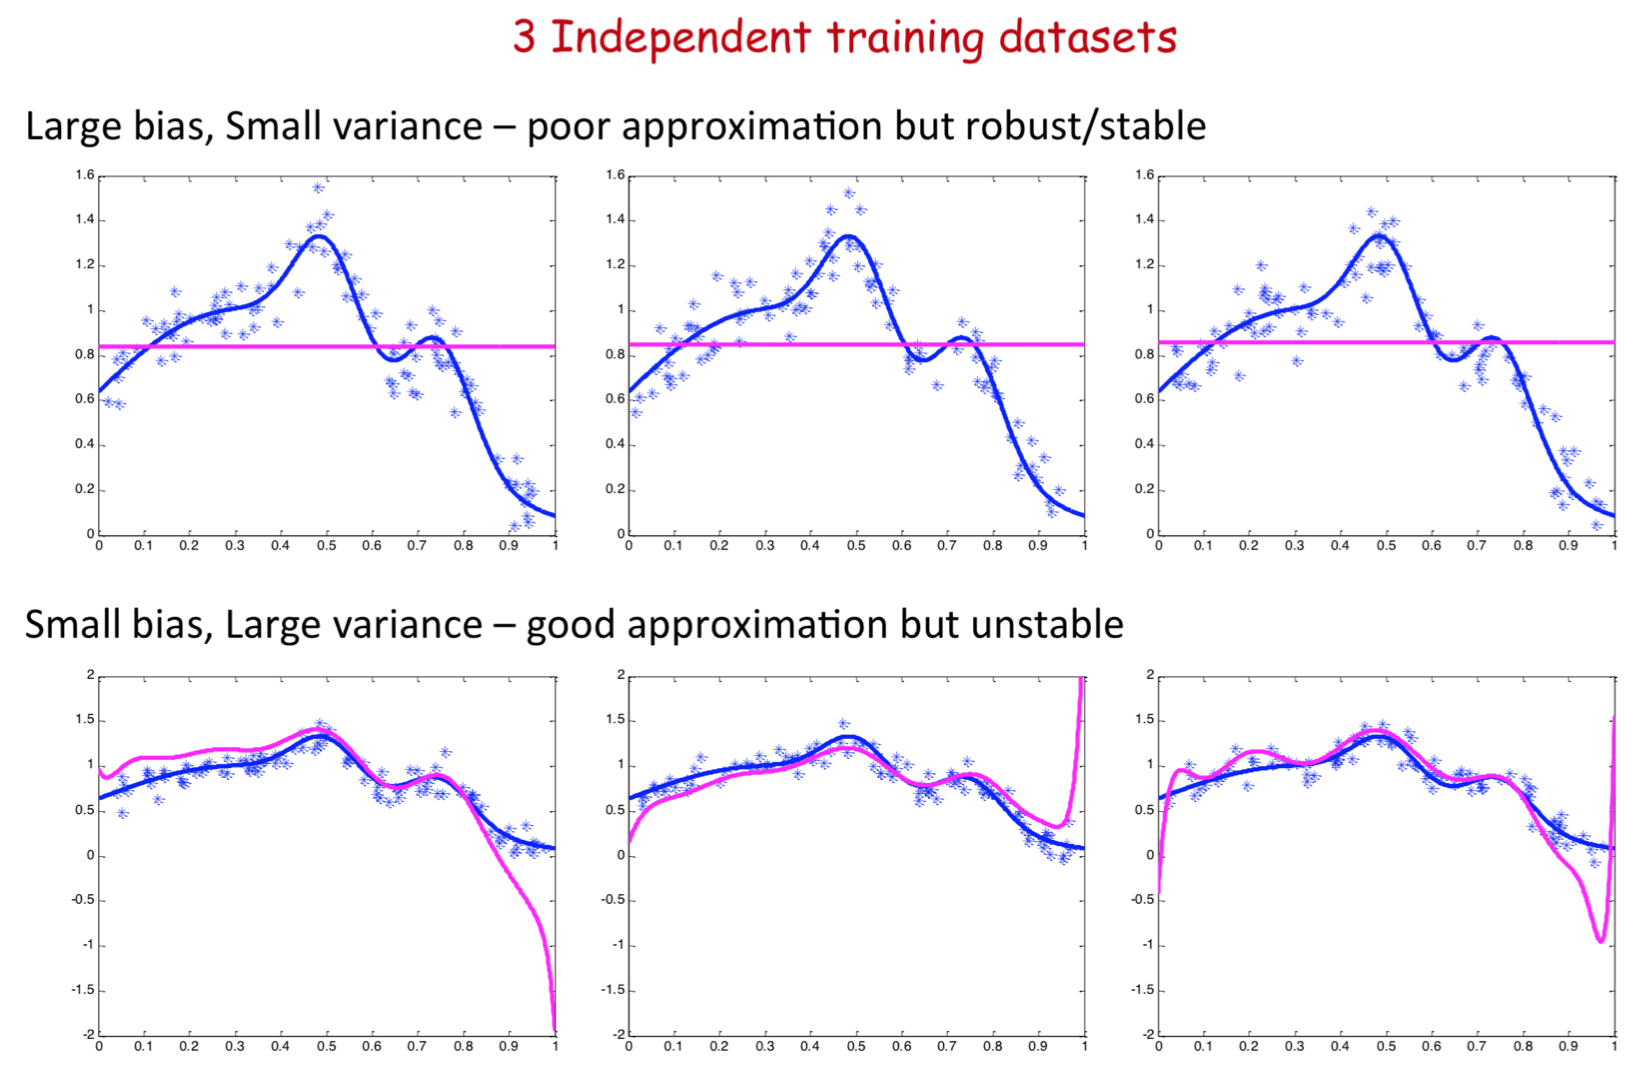

**QUIZ:**

Check the true statements about the behavior shown in the figure below:

1. It can only happen for small datasets<br><p>

1. It can happen for relatively large but noisy datasets<br><p>
   
1. It only depends on the selected model, not on the data<br><p>
    
1. It depends on both the complexity of the selected model and the properties of the data<br><p>

1: Indeed it can happen also for relatively large datasets, if model complexity is very large (e.g., potentially infinite)<br>
2: True<br>
3: It depends on both, in general<br>
4: True

## Regularization
<font size="+0.2">
    
<u>Regularized loss function,</u> $\ell^R({\bf w})$
</font>

<div>
  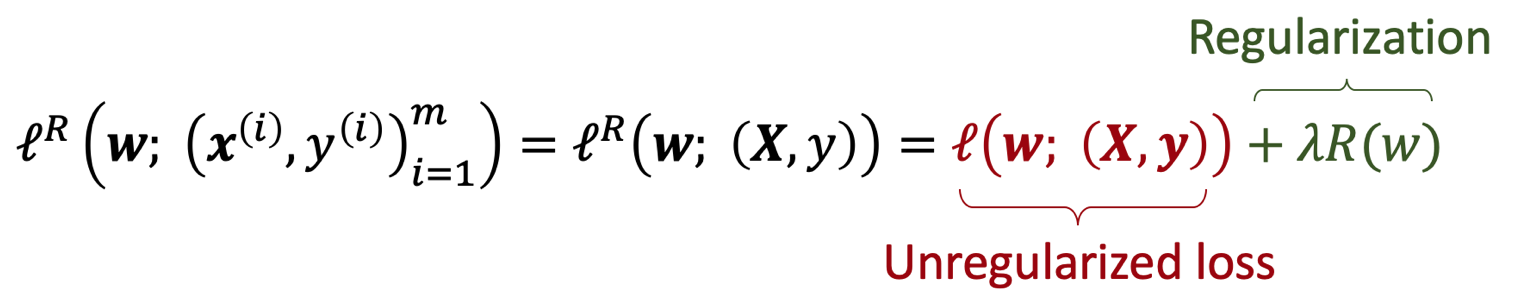
</div>


<font size="+0.2">
    
- The loss function $\ell$ is a measure of model-fit on the training data <br><p>

- The regularizer $R({\bf w})$, weighted by the parameter $\lambda$, **prevents the model from becoming too complex** by:<br><p>
    - <font style="color:red">penalizing weight values that are large,</font> such that weights do not get large values <u>if not strictly necessary for minimizing the loss </u>(main role of $R({\bf w})$);<br><p>
    - <font style="color:red">*possibly* bringing to zero weights that are very small.</font><br><p>
    
- Regularization is particularly important for small $m$, large feature spaces
</font>

<div>
  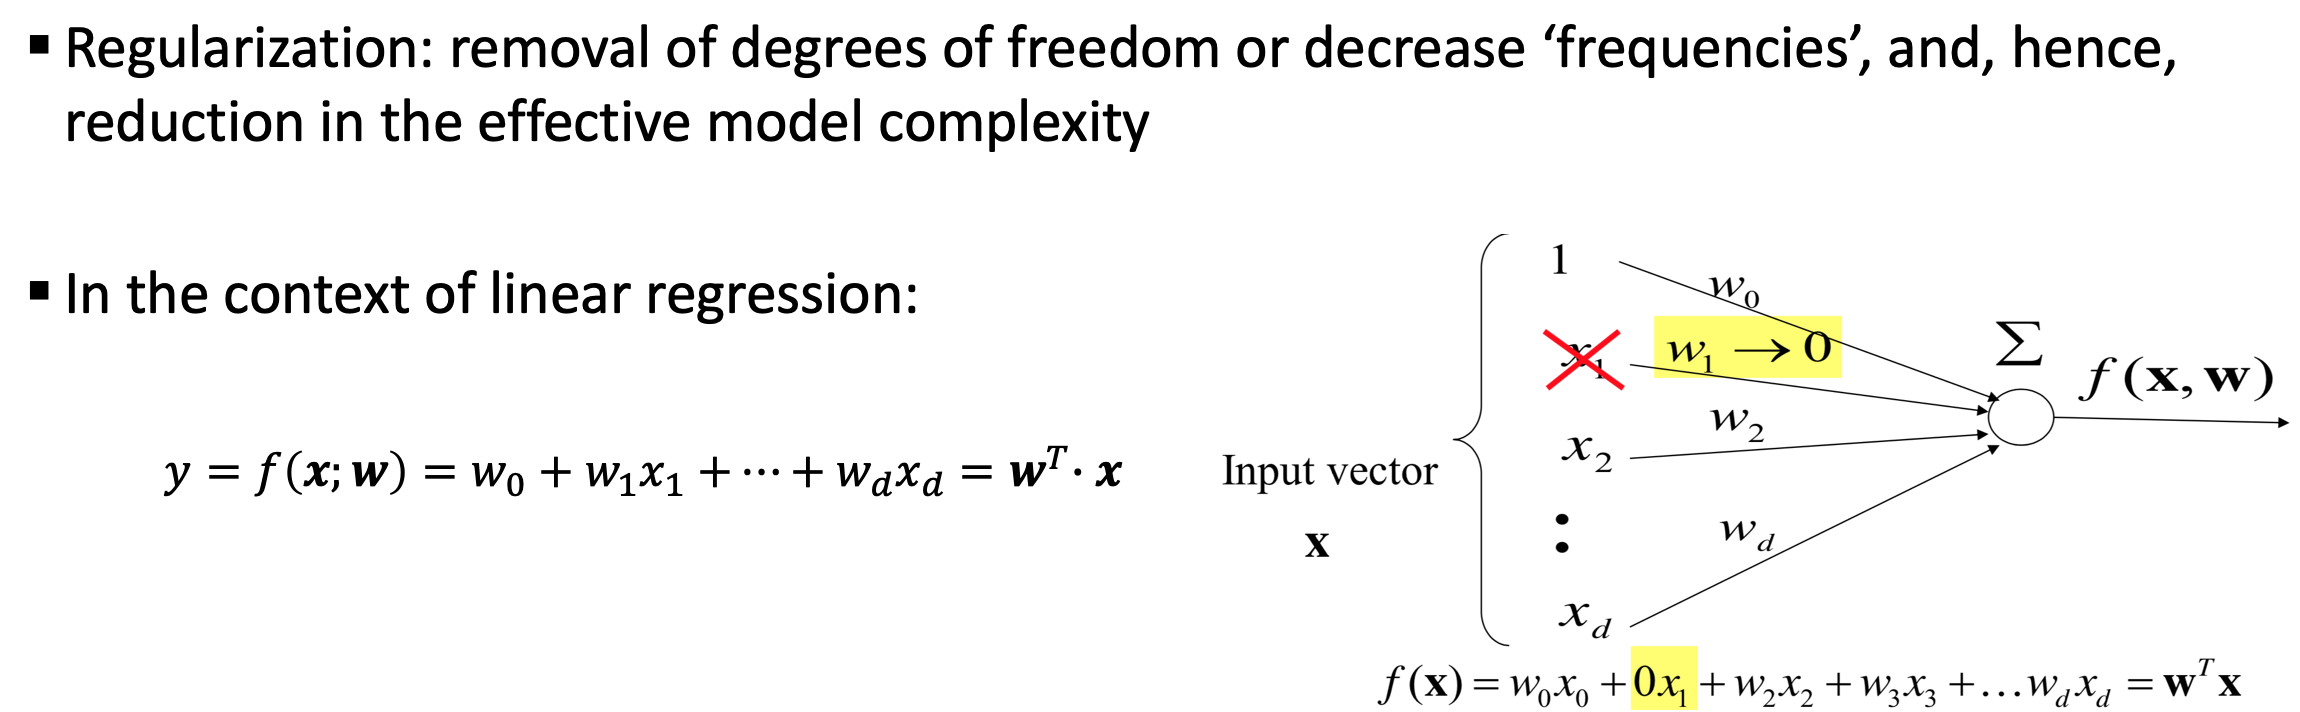
</div>

## Linear regression with additive regularization in the loss function

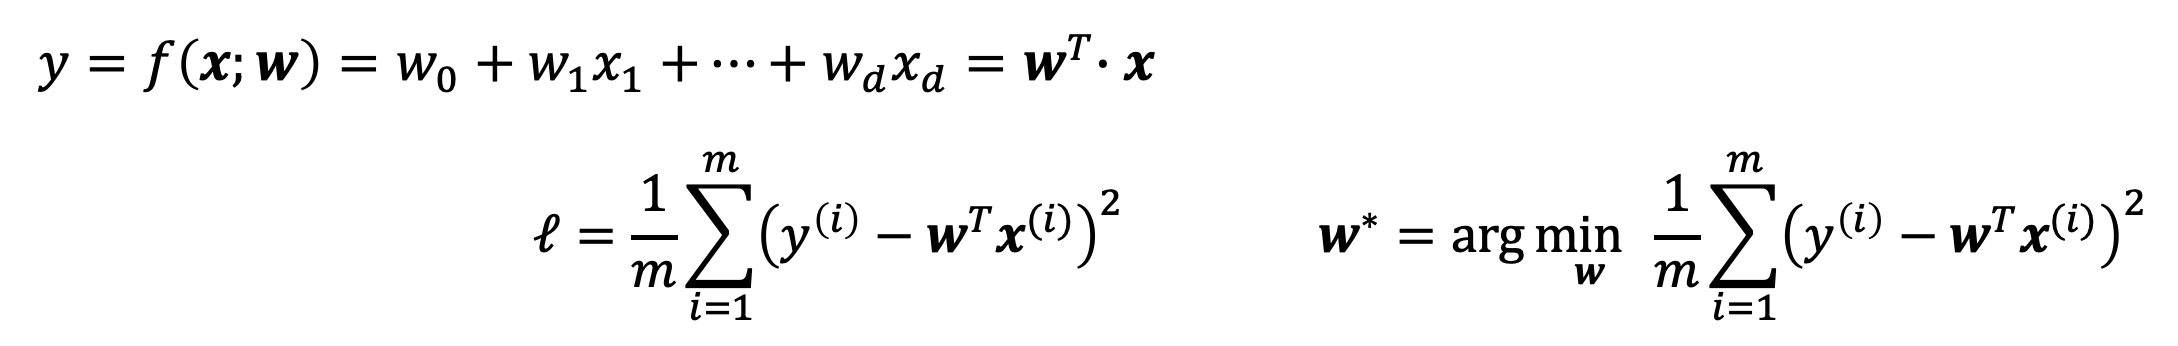

<font size="+0.2">
How do we force that the weights have possibly small values and can even be zeroed when they are quite small (i.e., do not bring much to the prediction)?<br><p>

There are several ways of doing it by defining an appropriate regularizer $R({\bf w})$ (which, by the way doesn't need to be an additive term to the loss function ...)


The most popular approaches can be mathematically framed in the general form below:
<br><p>

$$\color{blue}{\ell^R = \frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2 +  \lambda \sum_{j=1}^d |w_j|^q,} \quad \lambda, q > 0$$
 </font>

<font size="+0.2">
    
- For $q = 2$ the regularization term is the $L_2$-norm, the **squared Euclidean distance from the origin,** or, in other words, the squared length of the ${\bf w}$ vector measured according to the squared Euclidean distance<br><p>

- For $q = 1$ the regularization term is the $L_1$-norm, the **Manhattan distance from the origin,** or, in other words, the length of the ${\bf w}$ vector measured according to the Manhattan distance
</font>

We already saw this (first lecture on clustering):<br><p>

<div>
  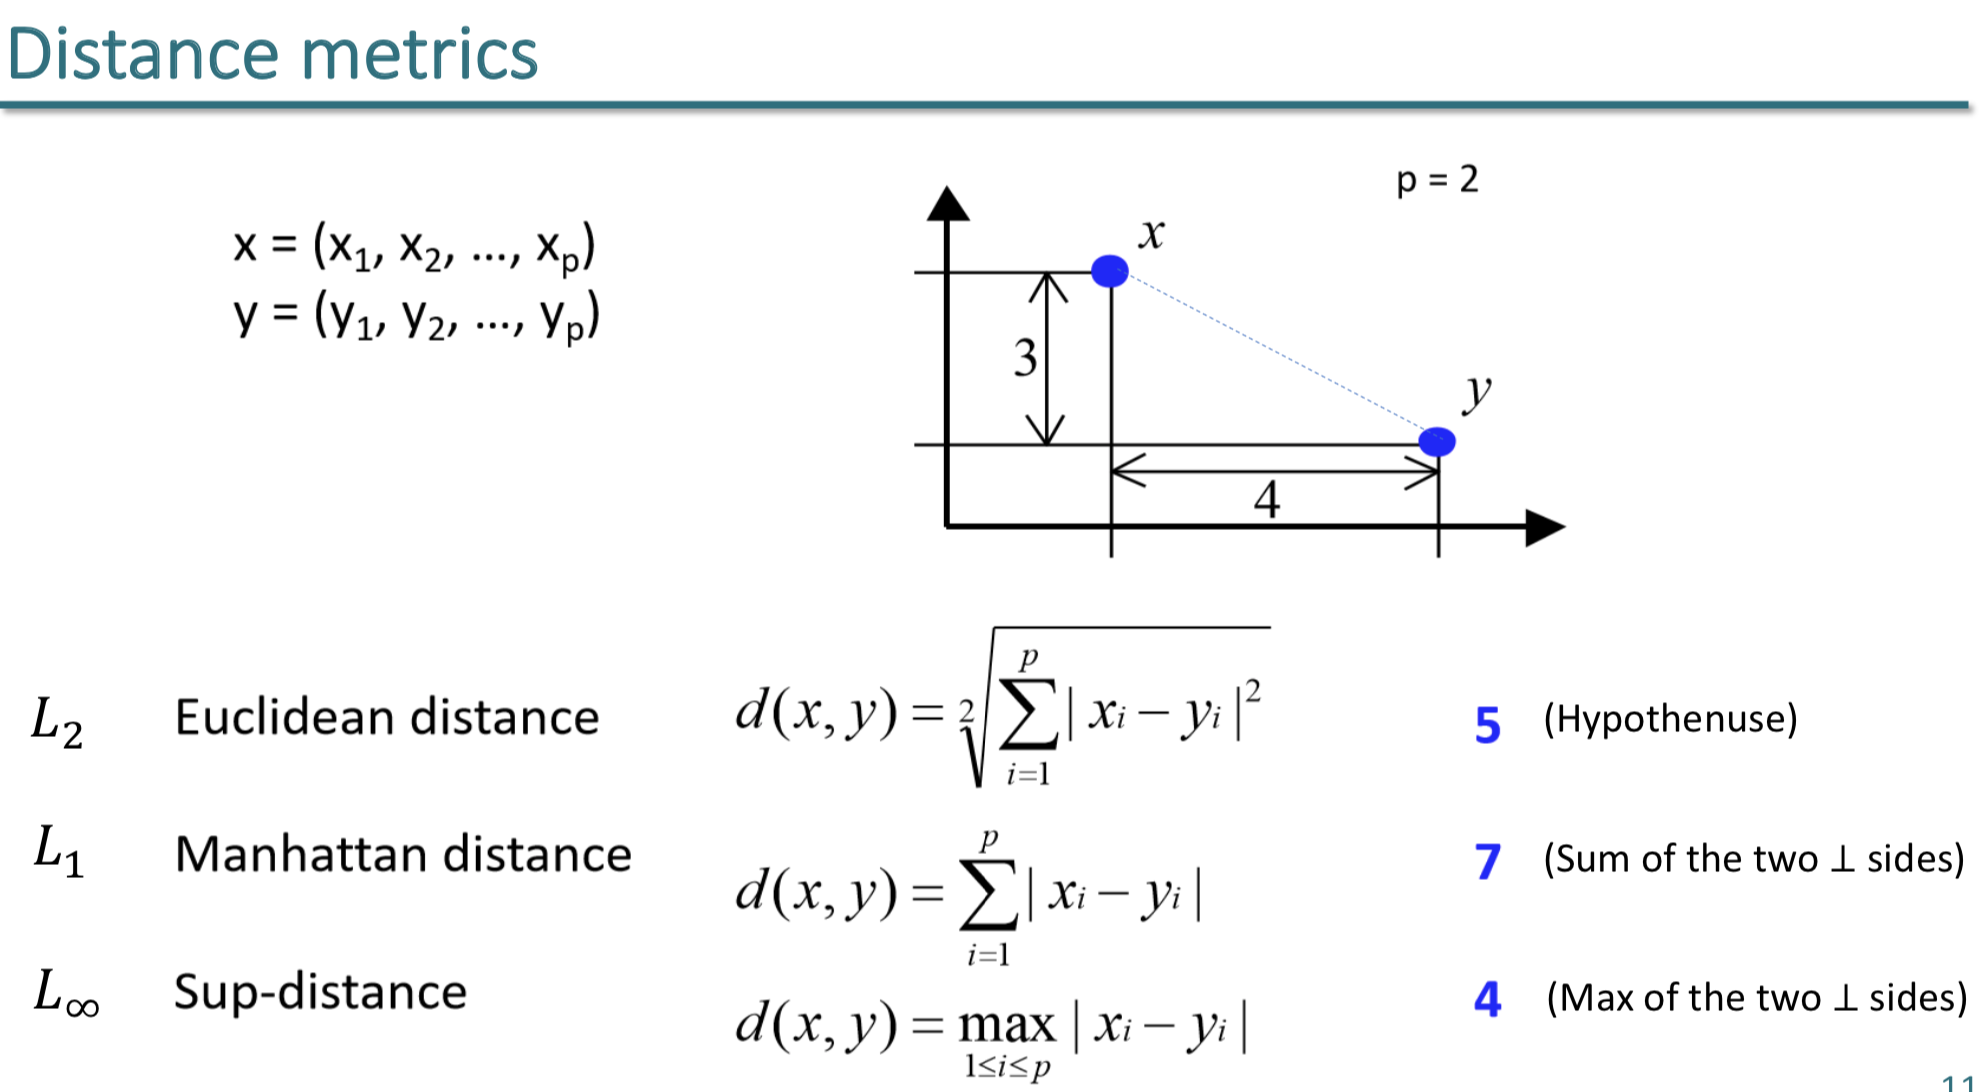
</div>

**QUIZ:**

Which distance metric seems to be more selective? (i.e., can *cut/shrink* the weights more?). Indicate the true answers.

1. $L_1$ <br><p>

1. $L_2$<br><p>
    
1. $L_{\infty}$<br><p>
    
1. They are all the same, more or less<br><p>
    
1. $L_1$ cut more large values, $L_2$ is more effective on small values.<br><p>

1: It is very aggressive on small weights, in [-1,1] that get zeroed, comparatively it is less aggressive than $L_2$ outside of this range. Indeed some weights can even get larger precisely to balance the fact that some other weights will be zeroed. <br>

2: It squares the values, therefore every weight outside of the [-1, 1] interval get amplified in the sum, resulting in the tendency to keep values overall low otherwise the regularization term could easily *explode*<br>

3: In principle $L_\infty$ is more conservative. It doesn't matter the sum, but rather a single large weight components might be enough to activate a strong penalty (of course, it depends on the value of $\lambda$). 

4: The opposite is true.


# Linear regression with Ridge regularization

<font style="font-size:130%">
<br><p>
<font style="color:red">$q = 2$, Euclidean distance: </font>
    
$$\begin{aligned}
\ell^R = \frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2 + 
\lambda \sum_{j=1}^d w_j^2 = \\
\frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2 + 
\lambda \sum_{j=1}^d {\bf w}^T {\bf w}, \quad \lambda \ge 0
\end{aligned}
$$
 </font>

<font style="font-size:130%">
<br><p>
<font style="color:red"> <i>Ridge</i> Regression Optimization Problem: </font>
    
$$
\begin{aligned}
{\bf w}^* = \arg \min_{{\bf w}} \ell^R = \arg \min_{{\bf w}}  
\Bigg[ \color{green}{\frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2} + 
\color{blue}{\lambda \sum_{j=1}^d w_j^2}\Bigg], \quad \lambda \ge 0
\end{aligned}
$$
 </font>
 <br><p>

<font size="+0.2">
    
- <u>Effect:</u>  In the calculation of the minimum, **all non-zero weights are penalized by a cost factor $\lambda$ (shrinkage coefficient)**<br><p>

- A candidate weight vector ${\bf w}$, provides to the *loss function* $\ell^R$:<br><p>
    
    - a <u style="color:green">positive contribution</u>, $\color{green}{\ell^+({\bf w})}$, based on how much it determines a good fit to the training data, by minimizing the MSE<br><p>
  
    - a <u style="color:blue">negative contribution</u>, $\color{blue}{\ell^-({\bf w})}$,  based on its squared $L_2$ norm, the higher the more negative, scaled by the penalty factor $\color{blue}{\lambda}$.<br><p>
    
    - The <u>Ridge-optimal weight vector</u> is the vector ${\bf w}^*$ that **best balances its positive and negative contributions in terms of minimizing the total loss:**
    
    $${\bf w}^* = \arg\min_{{\bf w}} \Big[ \color{green}{\ell^+({\bf w})} + \color{blue}{\lambda\ \ell^-({\bf w})} \Big].$$ 
    
</font>

<font size="+0.2">
<font style="color:red"><u>$\lambda$ controls the shrinkage of the weights:</u> the larger the value of $\lambda$ the greater the amount of shrinkage </font><br> (and the more the coefficients become robust to issues of collinearity).
</font>

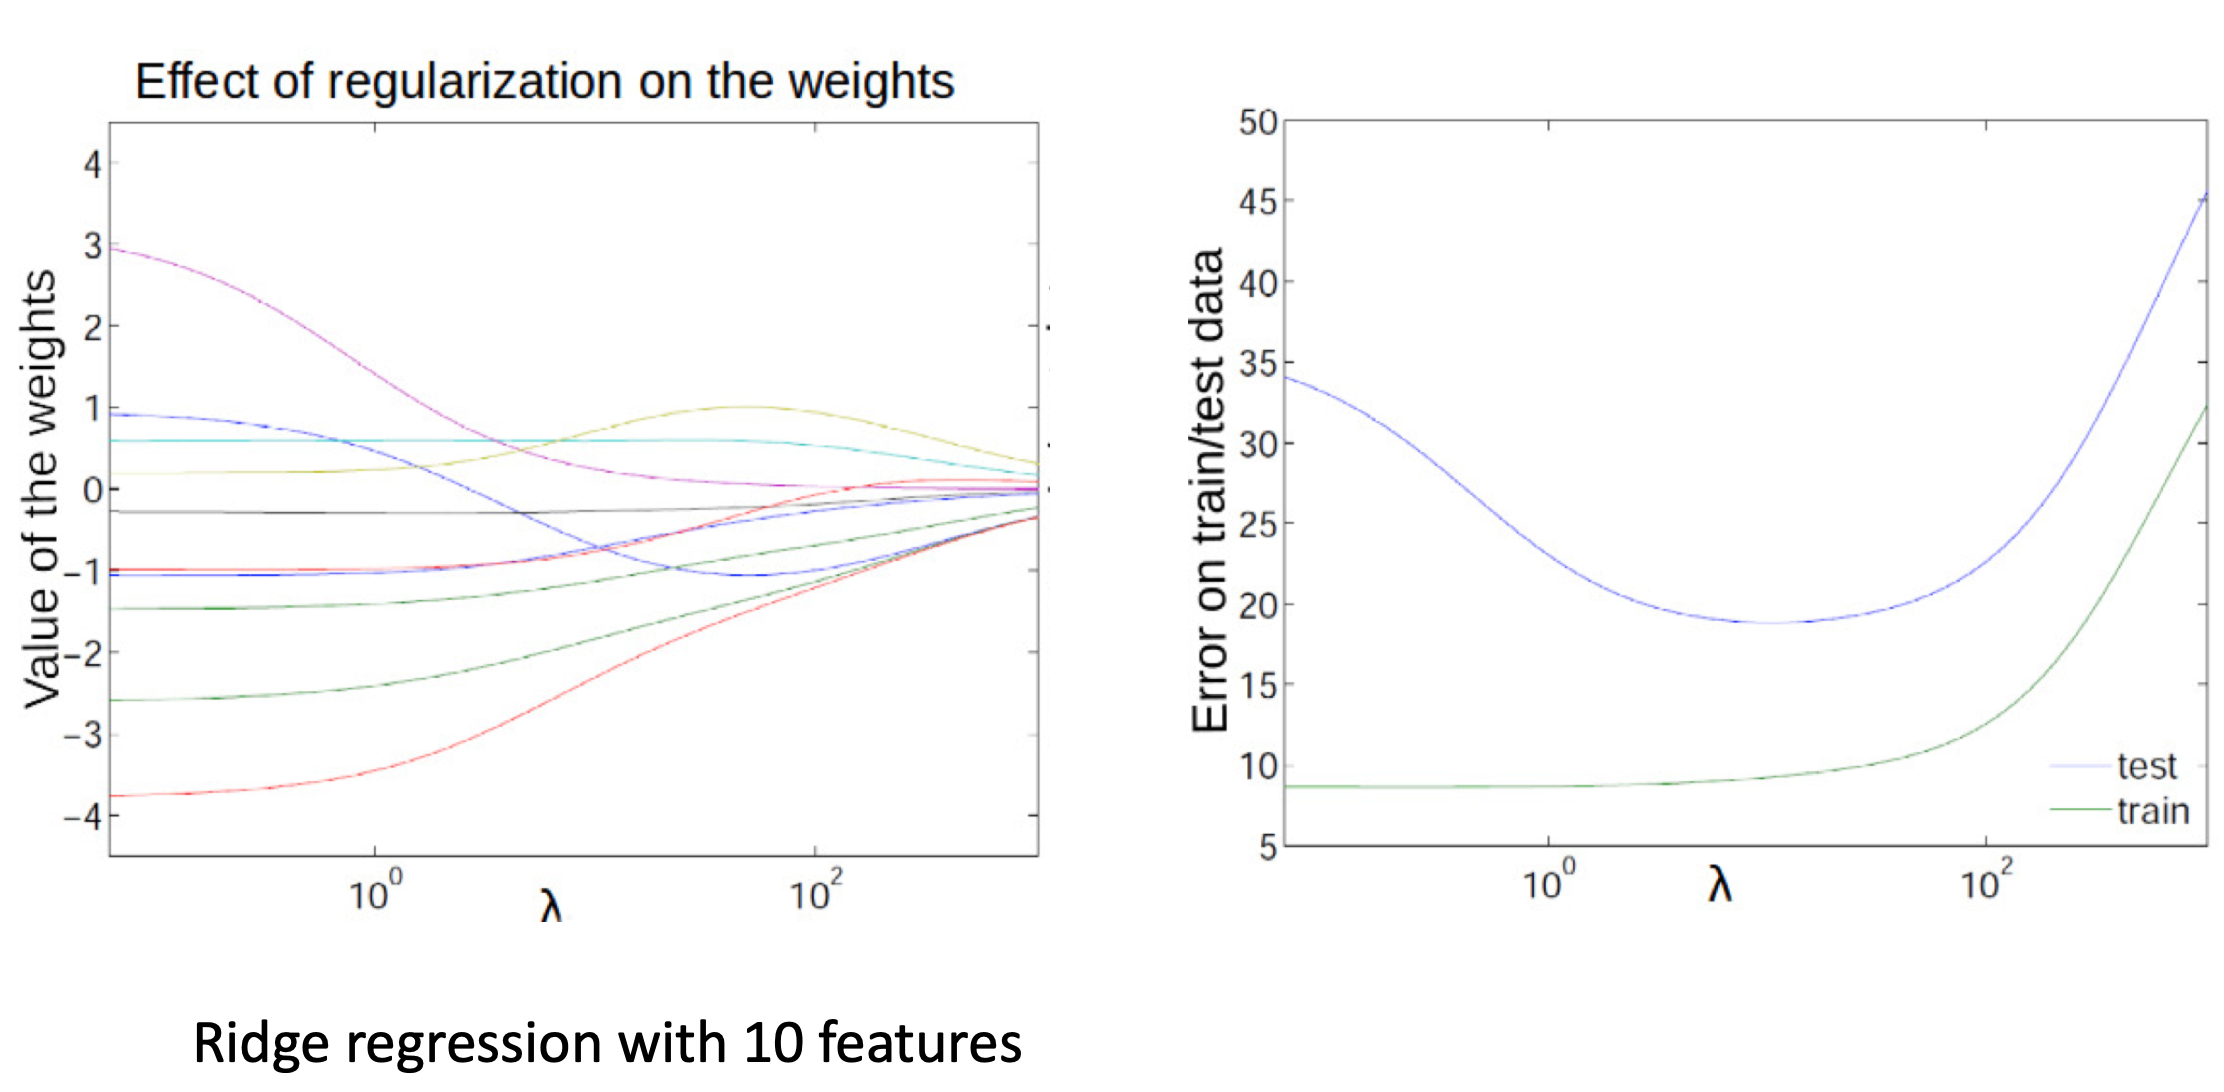

## Closed-form solution
<br>

<div>
  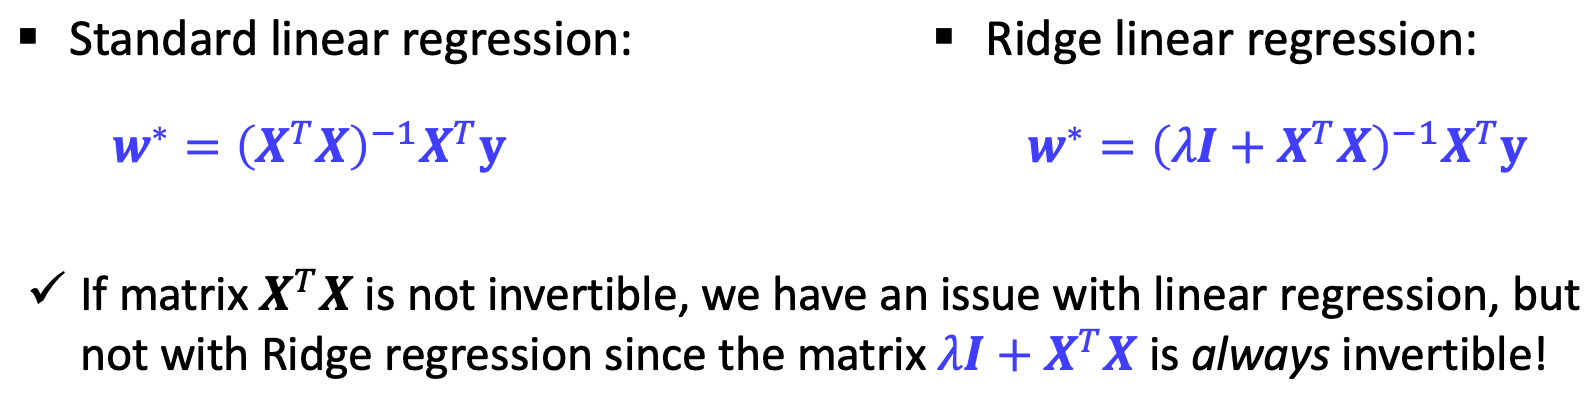
</div>

<span style="font-size:120%; text-align:middle">
Regression with polynomial features on a small dataset: Unregularized and Ridge-regularized solutions
</span><br>

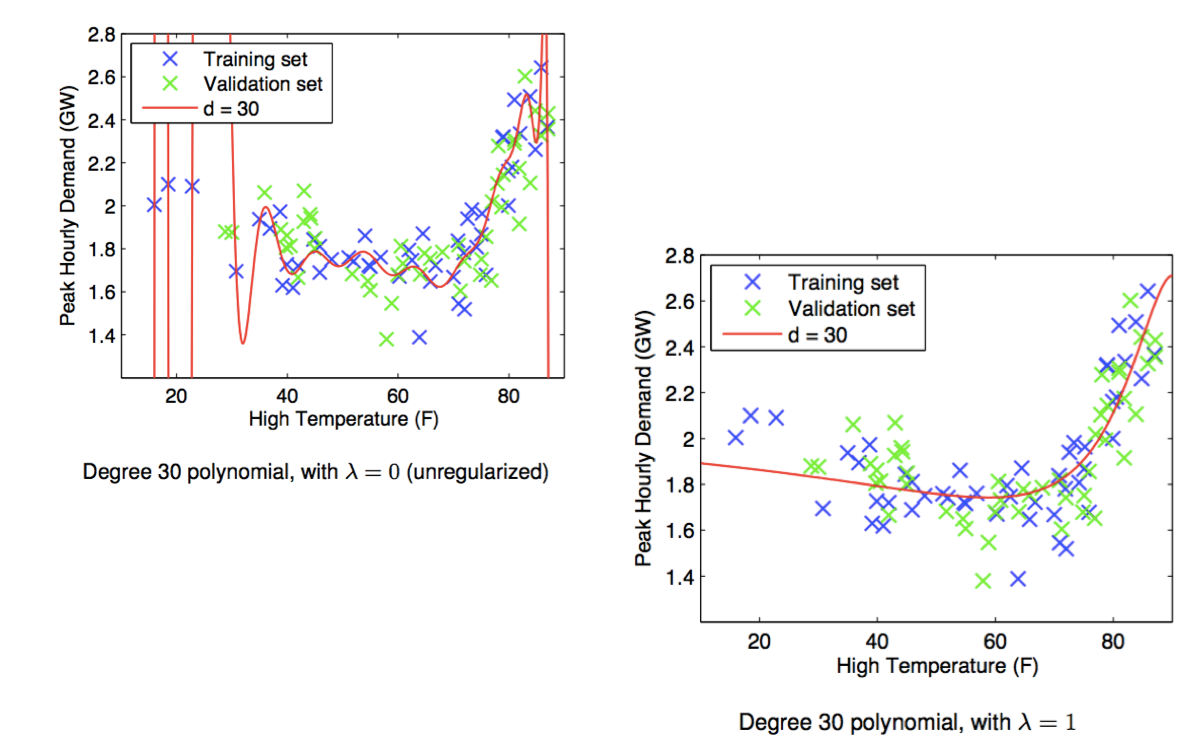

<span style="font-size:130%; text-align:middle">
Ridge regression with polynomial features, 9 example points, polynomial of degree 7, various $\lambda$
</span><br>

<div>
  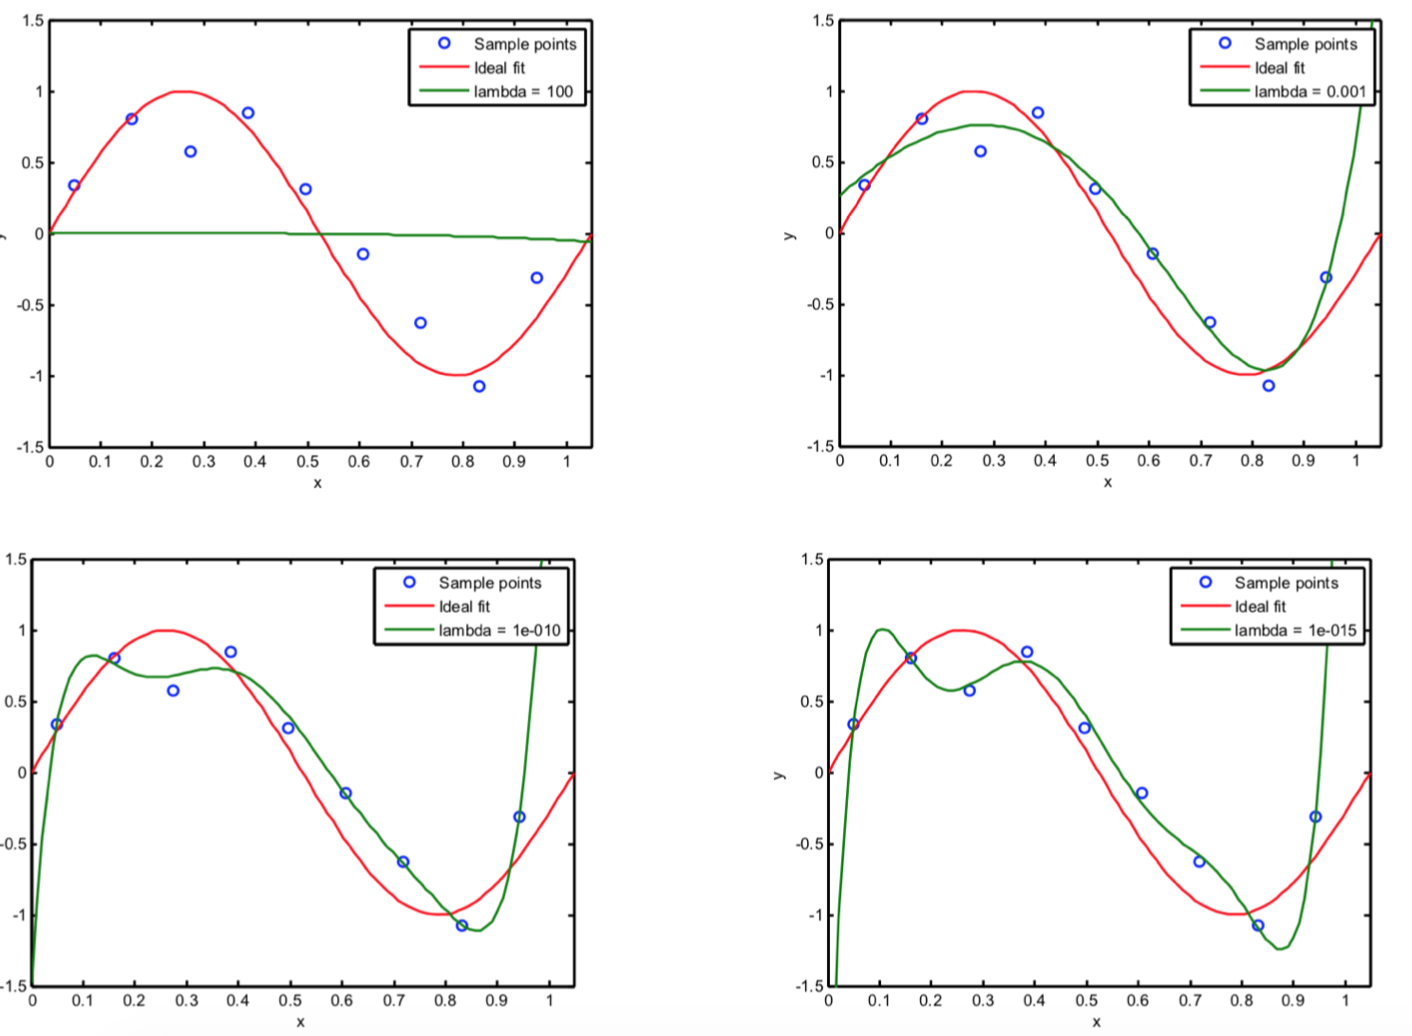
</div>

<span style="font-size:130%; text-align:middle">
OLS solutions, polynomial features of degree 3 and 5
</span><br>

<div>
  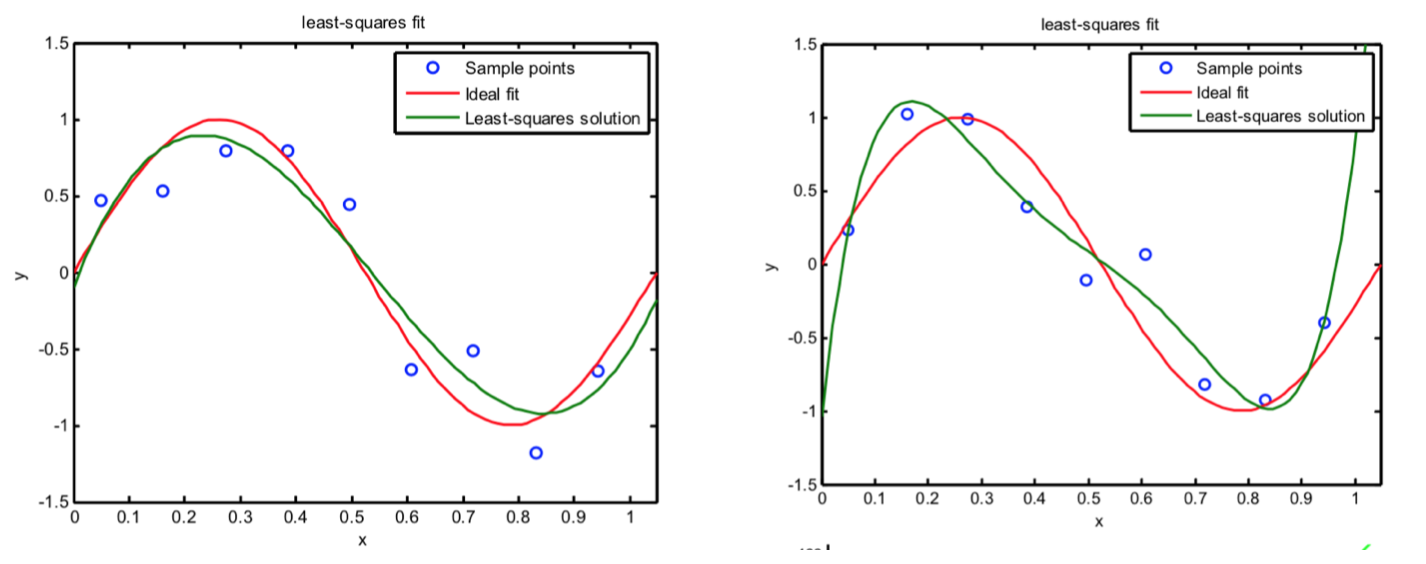
</div>

## Ridge regression at work

### Problem definition and data generation

<u>Numeric Example:</u>

- Let's consider a dataset $D=\{X, Y\}$ consisting of $n$ data samples generated out of a univariate polynomial $y = p(x)$ of order 3:

$$ p(x) = c_0 x^3 + c_1 x^2 + c_2 x + c_3 $$

- The specific coefficients of the ground truth model are:

$${\bf c} = [1,\ -23.0,\ 25.0,\ 0.5]$$

- Feature values $x\in X$ range in $[xmin,\ xmax]$, and are sampled uniformly in the interval<br><p>
    
- In the dataset $D$, each data point $p(x)\in Y$ is *corrupted* by some relatively large Gaussian noise, $N(\sigma, \mu)$, where $\sigma$ is a function of $[xmin,\ xmax]$<br><p>
 


    


In [1233]:
# let's make the basic imports

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi']= 180 # set the resolution to x dpi

In [1234]:
# these are just utility functions that make a pretty printing of the polynomial
# and they also shows how to produce a formatted output from a python program!
#
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

def print_poly_fmt(poly_object):
    c = poly_object.c
    d = len(c)-1 
    poly_str = '**Polynomial function:** ${:.2f}x^{}'.format(c[0], d)
    for cc in c[1:]:
        d -=1 
        if d != 0:
            poly_str += ' {} {:.2f}x^{}'.format('+' if cc > 0 else '', cc, d)
        else:
            poly_str += ' {}{:.2f}$'.format('+' if cc > 0 else '-', cc)
    printmd(poly_str)     

In [1235]:
# here we generate the data

np.random.seed(999)

n_samples = 100

# sample features points x in a random uniform way between xmin and xmax
xmin = -2#-8
xmax =  5 #20
X = xmin + (xmax-xmin) * np.random.random(size=(n_samples,1))

# coefficient of the polynomial defining the ground truth function
#coeff = [0.5, -0.8, -0.40, -12, -250, -50, +5]
coeff = [1., -2.3, 2.5, 0]


# create a 1D polynomial object of degree len(c), and with coefficients c
# note that the constant term of the polynomial corresponds to c[len(c)-1]
#
polynomial = np.poly1d(coeff)

#print('Polynomial function:\n {}\n'.format(polynomial))
#print(polynomial)
print_poly_fmt(polynomial)  

y = polynomial(X.ravel())

ymax = y.max()
ymin = y.min()

# apply a std which depend on the value range
sigma = 0.05 * abs(ymax - ymin)
mu = 1
#print(sigma, mu)

Y_targets = y  + (sigma * np.random.randn(n_samples) + mu)

#print('Clean poly values: {}'.format( [round(yy, 2) for yy in y] ))
#print('Y target values: {}'.format( [round(yt, 2) for yt in Y_targets] ))
#print('X feature values:', X)

**Polynomial function:** $1.00x^3  -2.30x^2 + 2.50x^1 -0.00$

### Visualize data and ground truth function

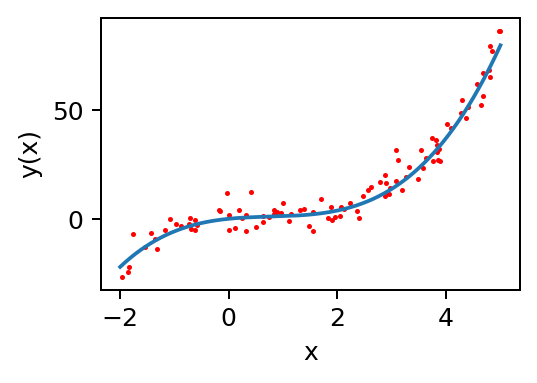

In [1236]:
# plot ground truth and data samples

fig = plt.figure('ref', figsize=(3,2))
data_plt = fig.add_subplot(1,1,1)

# plot the ground truth function
x_plot = np.linspace(xmin, xmax, 1000)
data_plt.plot(x_plot, polynomial(x_plot))

# plot the data
data_plt.scatter(X, Y_targets, s=1, c='r')

data_plt.set_xlabel('x')
data_plt.set_ylabel('y(x)')
plt.show()

### Solve with OLS (unregularized solution)

In [1237]:
from sklearn import linear_model 

# Create OLS linear regression object
OLS = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
OLS.fit(X, Y_targets)

# The coefficients
print('Model Coefficients: {:.2f} {:.2f}\n'.format(OLS.coef_[0], OLS.intercept_))

Model Coefficients: 10.57 -4.00



In [1238]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(Y_targets, OLS.predict(X))

print('Mean Squared Error: {:.2f}'.format(MSE))

print('Coefficient of determination: {:.2f}'.format(r2_score(Y_targets, 
                                                             OLS.predict(X))))

Mean Squared Error: 153.27
Coefficient of determination: 0.74


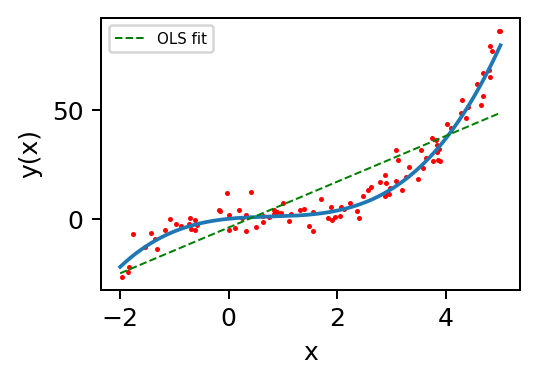

In [1239]:
# plot the linear regression fit

data_plt.plot(x_plot, OLS.intercept_ + (OLS.coef_[0]) * x_plot, 
              c='g', linestyle='--', linewidth=0.8, label='OLS fit')

data_plt.legend(fontsize=6)
fig

### Solve with Ridge regression

In [1240]:
from sklearn import linear_model 

# Create Ridge linear regression object
penalty = 150
Ridge = linear_model.Ridge(penalty)

# Train the model using the training sets
Ridge.fit(X, Y_targets)

# The coefficients
print('Model Coefficients: {:.2f} {:.2f}\n'.format(Ridge.coef_[0], Ridge.intercept_))

Model Coefficients: 7.68 1.33



In [1241]:
# Make predictions using the test set

MSE = mean_squared_error(Y_targets, Ridge.predict(X))

print('Mean Squared Error: {:.2f}'.format(MSE))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: {:.2f}'.format(r2_score(Y_targets, 
                                                             Ridge.predict(X))))

Mean Squared Error: 186.59
Coefficient of determination: 0.69


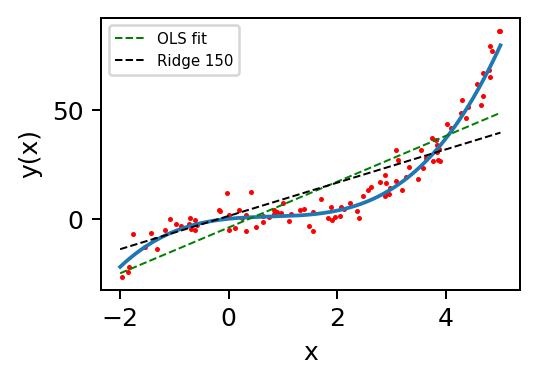

In [1242]:
# plot the linear regression fit

data_plt.plot(x_plot, Ridge.intercept_ + (Ridge.coef_[0]) * x_plot, 
              c='black', linestyle='--', linewidth=0.8, label='Ridge {}'.format(penalty))

data_plt.legend(fontsize=6)
fig

# Linear regression with Lasso regularization
<br>

<font size="+0.2">
    
Ridge regularization can shrink the weights but not really *prune* them (i.e., bring them to zero). 

Lasso (Least Absolute Shrinkage Selector Operator) regularization is more aggressive in this respect and can be used when we search for solutions with **fewer non-zero weights,** effectively reducing the number of features upon the given solution is dependent. 

In particular, all weights between [−1,1] are pushed harder to zero than in the L2 norm case.
    
**Lasso favors a <i>sparse</i> solution in terms of features / weights**
</font>

<font style="font-size:130%">

<font style="color:red">$q = 1$, Manhattan distance:</font>
    
$$\begin{aligned}
\ell^R = \frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2 + 
\lambda \sum_{j=1}^d |w_j|,\quad \lambda \ge 0
\end{aligned}
$$
 </font>

<font style="font-size:130%">
<br><p>
<font style="color:red"> <i>Lasso</i> Regression Optimization Problem: </font>
    
$$
\begin{aligned}
{\bf w}^* = \arg \min_{{\bf w}}  
\Bigg[ \color{green}{\frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2} +
\color{maroon}{\lambda_1 \sum_{j=1}^d |w_j|}\Bigg], \quad \lambda \ge 0
\end{aligned}
$$
 </font>
 <br><p>

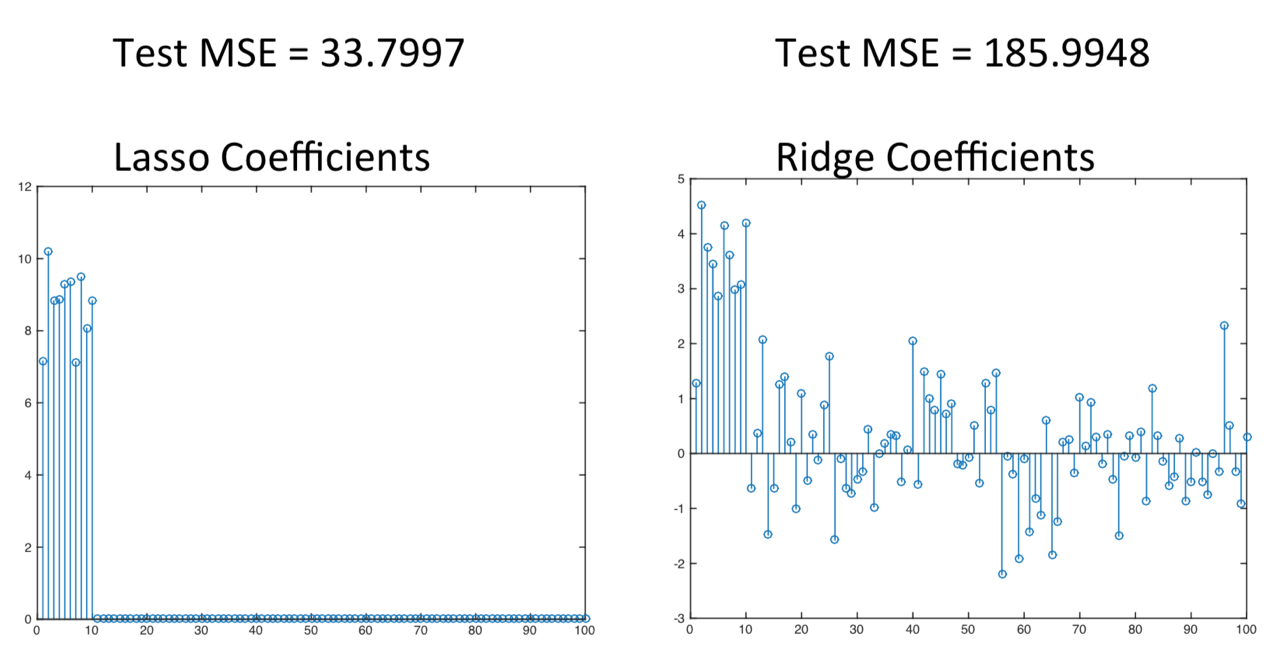

## Lasso regularization at work

In [1243]:
from sklearn import linear_model 

# Create Lasso linear regression object
penalty = 50
Lasso = linear_model.Lasso(penalty)

# Train the model using the training sets
Lasso.fit(X, Y_targets)

# The coefficients
print('Model Coefficients: {:.2f} {:.2f}\n'.format(Lasso.coef_[0], Lasso.intercept_))

Model Coefficients: 0.00 15.46



In [1244]:
# Make predictions using the test set

MSE = mean_squared_error(Y_targets, Lasso.predict(X))

print('Mean Squared Error: {:.2f}'.format(MSE))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: {:.2f}'.format(r2_score(Y_targets, 
                                                             Lasso.predict(X))))

Mean Squared Error: 598.37
Coefficient of determination: 0.00


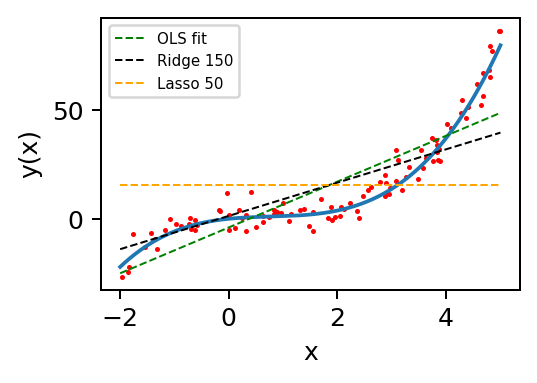

In [1245]:
# plot the linear regression fit

data_plt.plot(x_plot, Lasso.intercept_ + (Lasso.coef_[0]) * x_plot, 
              c='orange', linestyle='--', linewidth=0.8, label='Lasso {}'.format(penalty))

data_plt.legend(fontsize=6)
fig

# Elastic Net regularization: blending Ridge and Lasso

Which one to choose? Ridge or Lasso? Why not both!

**Elastic net** is a regularized regression method that **linearly combines the $L_1$ and $L_2$ penalties of the Lasso and Ridge methods.**

<font style="font-size:130%">
<br><p>
<font style="color:red"> <i>Elastic Net<i> Regression Optimization Problem: </font>
    
$$
\begin{aligned}
{\bf w}^* = \arg \min_{{\bf w}}  
\Bigg[ \color{green}{\frac{1}{m}\sum_{i=1}^m\Big(y^{(i)}- {\bf w}^T{\bf x}^{(i)}\Big)^2} +
\color{maroon}{\lambda_1 \sum_{j=1}^d |w_j|} +
\color{blue}{\lambda_2 \sum_{j=1}^d w_j^2} \Bigg], \quad \lambda \ge 0
\end{aligned}
$$
 </font>

**TRY-IT YOURSELF!**

Let's implement a piece of code that: 

- defines a 1D multimodal function,<br><p>
- generate a small dataset by adding a large Gaussian noise to the values of the multimodal function <br><p>
- plot the values together with the function <br><p>
- fit the data with a relatively large degree polynomial features <br><p>
- compare the fitting curve for different samples of the dataset<br><p>
- check the behavior of different regularizations<br><p>
